# Homework 05

## Due Tuesday, March 29th

### 1. Flyover states

_[This is very similar to the exercise done in class. This is a continuation.]_

What states do you see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

> LAX: 33.9425° N, 118.4081° W

> EWR: 40.6925° N, 74.1686° W

Load in the `states_21basic` shapefile using these commands:

    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
            urcrnrlon=-50.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-100.,lat_ts=20.)
    m.readshapefile('../materials/states_21basic/states', 'states')

The boundary information for all of the states is now held in an attribute of the map object `m.states`, which is a list of lists of x-y pairs denoting the boundaries. Next use the `m.gcpoints` function to get the points along the great circle path. Convert all of these things into Shapely objects, and check for intersections. Add a buffer of 100km to the flight path to see what states you might potentially see along the way. Use this analysis to provide the following:

1. Create and display a map that shows the flight path, with the states that are seen along the flight path clearly highlighted in some way.

2. Use the information in m.states_info to extract and print a list containing the names of the states seen, with unique names. (see `np.unique`)


['Arizona' 'California' 'Colorado' 'Connecticut' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Missouri' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico'
 'New York' 'Ohio' 'Pennsylvania' 'Utah' 'West Virginia']


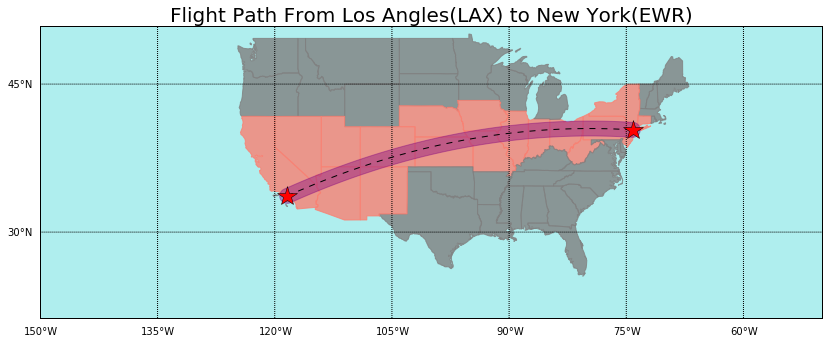

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(14, 14))
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('../materials/states_21basic/states', 'states')

lat_LAX = 33.9425
lon_LAX = -118.4081
lat_EWR = 40.6925
lon_EWR = -74.1686
x_LAX, y_LAX = m(lon_LAX, lat_LAX)
x_EWR, y_EWR = m(lon_EWR, lat_EWR)

ax = fig.add_subplot(111, axis_bgcolor='paleturquoise')

flightpoint_x, flightpoint_y = m.gcpoints(lon_LAX, lat_LAX, lon_EWR, lat_EWR, 500)
flightpoint = zip(flightpoint_x, flightpoint_y)
flightline = shapely.geometry.LineString(flightpoint)
flightline_buffer = flightline.buffer(100000)

states_poly=[]
state_name=[]
for state in m.states:
    states_poly.append(shapely.geometry.Polygon(state))
for i in range(len(states_poly)):
    if states_poly[i].intersects(flightline_buffer):
        color = 'salmon'
        state_name.append(m.states_info[i]['STATE_NAME'])
    else:
        color = 'gray'
    plt.fill(*states_poly[i].boundary.xy, color=color, alpha=0.8)

plt.fill(*flightline_buffer.boundary.xy, color='purple',alpha=0.4)
m.plot(flightpoint_x, flightpoint_y, '--k')
m.plot(x_LAX, y_LAX, marker='*',color='r',markersize=20)
m.plot(x_EWR, y_EWR, marker='*',color='r',markersize=20)
m.drawmeridians(np.arange(-180, 180, 15), labels=[0, 0, 0, 1] )
m.drawparallels(np.arange(-90, 90, 15), labels=[1, 0, 0, 0] )
ax.set_title('Flight Path From Los Angles(LAX) to New York(EWR)',fontsize=20)
plt.draw()
print(np.unique(state_name))

### 2. Area in a Voronoi diagram

Given the series of points:

     np.array([[ 0.77354201,  0.34072038],
               [ 0.43807549,  0.93001924],
               [ 0.5624092 ,  0.79438991],
               [ 0.02536295,  0.46180244],
               [ 0.59533179,  0.07522803],
               [ 0.47867418,  0.70302822],
               [ 0.30371564,  0.83135442],
               [ 0.5856915 ,  0.16340903],
               [ 0.14700491,  0.60268997],
               [ 0.97098631,  0.51692456]])
               
create a Voronoi diagram, and calculate the area contained in the finite regions. What fraction of the total area is at least 0.001 unit away from any boundary? 0.01 away? And 0.1 away?


The area contained in the finite regions:  1.01389122133
The fraction of the total area which is at least 0.001 unit away from any boundary:  0.986090261784
The fraction of the total area which is at least 0.01 unit away from any boundary:  0.865253615351
The fraction of the total area which is at least 0.1 unit away from any boundary:  0.0924424566394


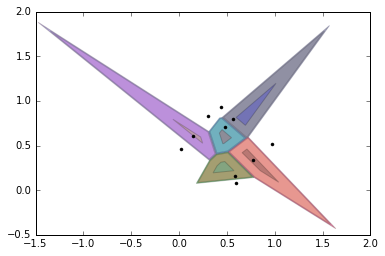

In [98]:
from __future__ import print_function   # Python 2/3 compatability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import shapely.geometry
import shapely.ops
from scipy import spatial

pts= np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])
vor = spatial.Voronoi(pts)
polygon1=[]
for indices in vor.regions:
    if not indices: continue     
    if -1 in indices: continue   
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)
    polygon1.append(shapely.geometry.Polygon(zip(vor.vertices[indices, 0],vor.vertices[indices, 1])))

sum0, sum1, sum2, sum3 = 0 , 0 , 0 , 0
for poly in polygon1:
    sum0 += poly.area
    sum1 += poly.buffer(-0.001).area
    sum2 += poly.buffer(-0.01).area
    sum3 += poly.buffer(-0.1).area
    plt.fill(*poly.buffer(-0.001).boundary.xy, alpha=0.2)
    plt.fill(*poly.buffer(-0.01).boundary.xy, alpha=0.2)
    plt.fill(*poly.buffer(-0.1).boundary.xy, alpha=0.2)

plt.plot(pts[:, 0], pts[:, 1], '.k')

print('The area contained in the finite regions: ',sum0)
print('The fraction of the total area which is at least 0.001 unit away from any boundary: ', sum1/sum0)
print('The fraction of the total area which is at least 0.01 unit away from any boundary: ' , sum2/sum0)
print('The fraction of the total area which is at least 0.1 unit away from any boundary: ' , sum3/sum0)


       



### 3. 2D interpolation

Data (found in `python4geosciences/data/MS03_L15.txt`) gathered from a field cruise out of the TAMU Oceanography department is randomly located in space (that is, unstructured) because of the nature of the measurement: the instrument is lowered into the water from a ship, and is brought up and down through the water column as the ship moves to get a sampling of the fields.

Read in the data file and plot the temperature in a `scatter` plot as a function of depth and latitude. Next, interpolate the temperature data to be on a uniform grid (to make it structured). Now, plot it using `contourf`, which requires structured data. Experiment with different spacing in your uniform grid, and with different numbers of contours to see how the results change, and choose values that provide a nice-looking image which closely resembles the original data.

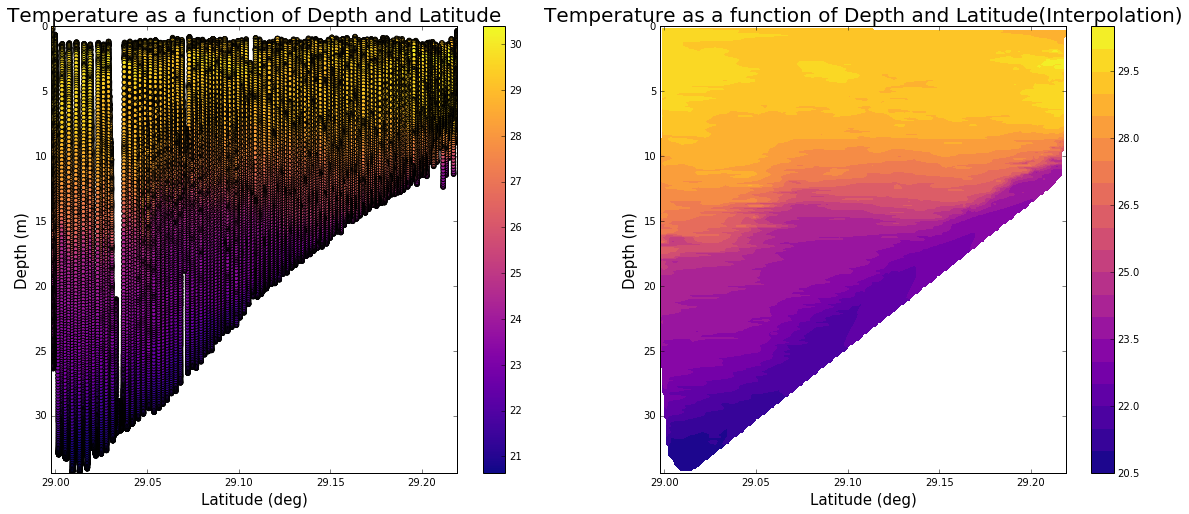

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import scipy.interpolate 


data = np.genfromtxt('D:/OCNG689/python4geosciences/data/MS03_L15.txt', skip_header=114)
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121)
a=ax1.scatter(data[:,0], data[:,2], c=data[:,15],cmap='plasma')
plt.colorbar(a)
ax1.set_title('Temperature as a function of Depth and Latitude',fontsize=20)
ax1.set_ylabel('Depth (m)',fontsize=15)
ax1.set_xlabel('Latitude (deg)',fontsize=15)
ax1.set_xlim(np.min(data[:,0]), np.max(data[:,0]))
ax1.set_ylim(np.min(data[:,2]), np.max(data[:,2]))
ax1.invert_yaxis()

ax2 = fig.add_subplot(1,2,2)
l = np.linspace(data[:,0].min(), data[:,0].max(), 200)
d = np.linspace(data[:,2].min(), data[:,2].max(), 200)
x, y = np.meshgrid(l, d)
linearz = interpolate.griddata((data[:,0], data[:,2]), data[:,15], (x, y), method='linear')
linear_plot = ax2.contourf(l,d,linearz, 20, cmap='plasma')
plt.colorbar(linear_plot)
ax2.set_ylabel('Depth (m)',fontsize=15)
ax2.set_xlabel('Latitude (deg)',fontsize=15)
ax2.set_title('Temperature as a function of Depth and Latitude(Interpolation)',fontsize=20)
ax2.invert_yaxis()

### 4. (Grad) Area of Greenland and Australia in different projections

Set up Basemap instances of the following projections: Mercator, Robinson, and Mollweide; make sure that all three projections are set up to show both Greenland and Australia at the same time (this is necessary for Mercator in particular). Plot them side-by-side to see how they compare.

Next, read in the shape files for Greenland and Australia, found in the `data` directory; you can do this with something like the following (but you might need to change the directory path):

> m.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
> m.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

where `m` is a `Basemap` instance. This gives you a series of polygons that make up each country, saved in `m.greenland` and `m.australia`. Find the area of the two countries in each projection and compare them. What is the area of Australia relative to the area of Greenland for each projection, and how does this compare to what it is in reality?




The area of Greenland under Mercator projection(Km*2):  30789355.3718
The area of Australia under Mercator projection(Km*2):  8501235.31069
The Ratio of the area between Greenland and Australia under Mercator projection is:  3.62175075111


The area of Greenland under Robinson projection(Km*2):  3423077.33214
The area of Australia under Robinson projection(Km*2):  6791690.51863
The Ratio of the area between Greenland and Australia under Robinson projection is:  0.504009616273


The area of Greenland under Mollweide projection(Km*2):  2134440.86263
The area of Australia under Mollweide projection(Km*2):  7699609.26928
The Ratio of the area between Greenland and Australia under Mollweide projection is:  0.277214179055


In real world, The Ratio of the area between Greenland and Australia is 836,300/2970000= 0.2816, so the Mollweide projection is more accurate


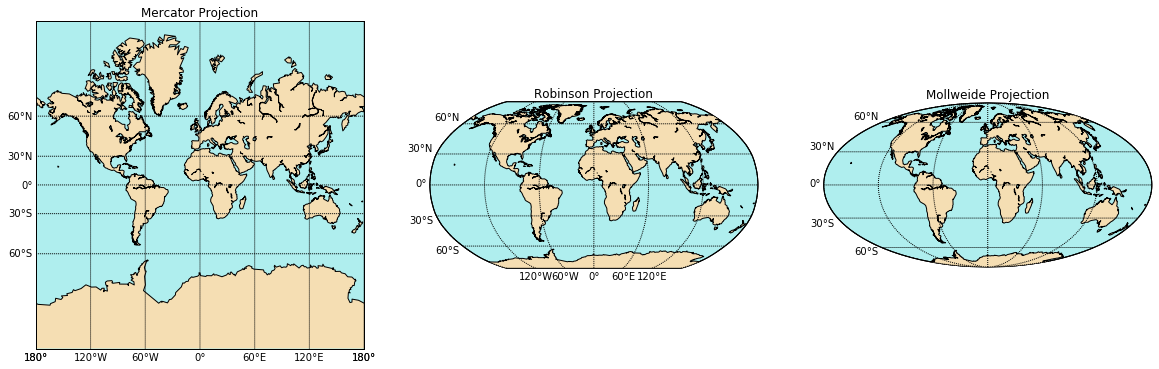

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

from mpl_toolkits.basemap import Basemap


m1 = Basemap(projection='merc',llcrnrlat=-85,urcrnrlat=85,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m2 = Basemap(projection='robin',lon_0=0,resolution='c')
m3 = Basemap(projection='moll',lon_0=0,resolution='c')

#### Mercator
fig = plt.figure(figsize=(20, 17))
ax1 = fig.add_subplot(131, axis_bgcolor='white')
m1.drawcoastlines()
m1.drawmeridians(np.arange(-180, 180, 60), labels=[0, 0, 0, 1] )
m1.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0] )
m1.readshapefile('D:/OCNG689/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m1.fillcontinents(color='wheat',lake_color='paleturquoise')
m1.drawmapboundary(fill_color='paleturquoise')
ax1.set_title("Mercator Projection")
greenland1=[]
for item in m1.greenland:
    greenland1.append(shapely.geometry.Polygon(item))
sum1=0
for poly in greenland1:
    sum1+=poly.area
m1.readshapefile('D:/OCNG689/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)
australia1=[]
for item in m1.australia:
    australia1.append(shapely.geometry.Polygon(item))
sum2=0
for poly in australia1:
    sum2+=poly.area


##### Robinson
ax2 = fig.add_subplot(132, axis_bgcolor='white')
m2.drawcoastlines()
m2.drawmeridians(np.arange(-180, 180, 60), labels=[0, 0, 0, 1] )
m2.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0] )
m2.readshapefile('D:/OCNG689/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m2.fillcontinents(color='wheat',lake_color='paleturquoise')
m2.drawmapboundary(fill_color='paleturquoise')
ax2.set_title("Robinson Projection")
greenland2=[]
for item in m2.greenland:
    greenland2.append(shapely.geometry.Polygon(item))
sum3=0
for poly in greenland2:
    sum3+=poly.area
m2.readshapefile('D:/OCNG689/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)
australia2=[]
for item in m2.australia:
    australia2.append(shapely.geometry.Polygon(item))
sum4=0
for poly in australia2:
    sum4+=poly.area

### Mollweide
ax3 = fig.add_subplot(133, axis_bgcolor='white')
m3.drawcoastlines()
m3.drawmeridians(np.arange(-180, 180, 60), labels=[0, 0, 0, 1] )
m3.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0] )
m3.readshapefile('D:/OCNG689/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m3.fillcontinents(color='wheat',lake_color='paleturquoise')
m3.drawmapboundary(fill_color='paleturquoise')
ax3.set_title("Mollweide Projection")
greenland3=[]
for item in m3.greenland:
    greenland3.append(shapely.geometry.Polygon(item))
sum5=0
for poly in greenland3:
    sum5+=poly.area
m3.readshapefile('D:/OCNG689/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)
australia3=[]
for item in m3.australia:
    australia3.append(shapely.geometry.Polygon(item))
sum6=0
for poly in australia3:
    sum6+=poly.area


plt.draw()
print('\n')
print('\n')
print('The area of Greenland under Mercator projection(Km*2): ',sum1*0.000001)  
print('The area of Australia under Mercator projection(Km*2): ',sum2*0.000001)
print('The Ratio of the area between Greenland and Australia under Mercator projection is: ',sum1/sum2)
print('\n')
print('The area of Greenland under Robinson projection(Km*2): ',sum3*0.000001)  
print('The area of Australia under Robinson projection(Km*2): ',sum4*0.000001)
print('The Ratio of the area between Greenland and Australia under Robinson projection is: ',sum3/sum4)
print('\n')
print('The area of Greenland under Mollweide projection(Km*2): ',sum5*0.000001)  
print('The area of Australia under Mollweide projection(Km*2): ',sum6*0.000001)
print('The Ratio of the area between Greenland and Australia under Mollweide projection is: ',sum5/sum6)
print('\n')
print('In real world, The Ratio of the area between Greenland and Australia is 836,300/2970000= 0.2816, so the Mollweide projection is more accurate' )